In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.linalg import inv
from tensorflow.keras.layers import Dense

In [109]:
train_data = pd.read_csv('/content/drive/MyDrive/csv_files/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/csv_files/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/csv_files/gender_submission.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train_data = train_data.replace(["female", "male"], [0, 1])
train_data = train_data.replace(["S", "C", "Q"], [0, 1, 2])
test_data = test_data.replace(["female", "male"], [0, 1])
test_data = test_data.replace(["S", "C", "Q"], [0, 1, 2])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1.0


In [111]:
Y_train = train_data[['Survived']]
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_train = np.nan_to_num(X_train)
Y_train = np.nan_to_num(Y_train)

Y_test = gender_submission[['Survived']]
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = np.nan_to_num(X_test)
Y_test = np.nan_to_num(Y_test)

In [112]:
Y_train = np.array(Y_train)
X_train = np.array(X_train)

Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [113]:
model = tf.keras.models.Sequential([
    Dense(7, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax'),
])

In [114]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [115]:
output = model.fit(X_train, Y_train, epochs = 200)

Epoch 1/200
28/28 [==============================] - 1s 4ms/step - loss: 0.6625 - accuracy: 0.6308
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6813
Epoch 3/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.6891
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.6958
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.6790
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.6790
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.6970
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.6981
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.7026
Epoch 10/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7082
Epoch 11/

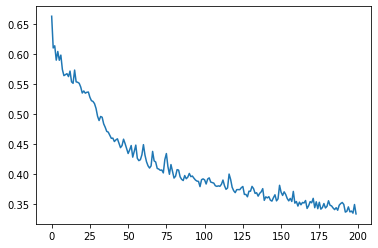

In [116]:
plt.plot(output.history['loss'])

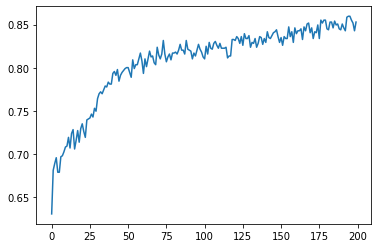

In [117]:
plt.plot(output.history['accuracy'])

In [119]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    #train
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    #test
    def predict(self, X_test):
        near_neighbor = self.nearestNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbor]))
        return y
    
    def evaluate(self, x_test, y_test):
        y_pred = []
        for i in range(len(x_test)):
          y = knn.predict(x_test[i])
          y_pred.append(y)
        
        not_correct = abs(sum(y_pred - y_test))
        return ((((len(y_pred) - not_correct)*100)/len(y_pred))/100)     

In [120]:
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)
knn = KNearestNeighbors(5)
knn.fit(X_train, Y_train)

print('k= 5  Accuracy=', knn.evaluate(X_test, Y_test))

k= 5  Accuracy= 0.9904306220095694


In [121]:
class AdalineClassifier:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))

    def predict(self, X_test):
        Y_predic = np.matmul(X_test, self.w)
        return Y_predic
    
    def evaluation(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        subtract = np.abs(Y_test - Y_predic)
        
        correct = 0
        for i in range(len(Y_pred)):
          if Y_test[i] == 0 and Y_pred[i] < 0.5:
            correct += 1
          if Y_test[i] == 1 and Y_pred[i] > 0.5:
            correct += 1

        average = np.mean(subtract)
        acc = (correct * 100) / len(Y_test) / 100
        return average, acc


In [122]:
model = AdalineClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
result = model.evaluation(X_test, Y_test)
print('evaluation= ',result[0],' Accuracy= ',result[1])

evaluation=  0.2731463040521892  Accuracy=  0.8971291866028709


In [123]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(891, 7) (891,)
(418, 7) (418,)


In [124]:
class Perceptron:
    def __init__(self):
        self.W = np.random.rand(7)
        self.b = np.random.rand(1)
        self.lr = 0.00001
        self.loss = []

    def fit(self, x_train, y_train):

        for i in range(len(x_train)):    
            y_pred = np.matmul(x_train[i], self.W) + self.b
            e = y_train[i] - y_pred
            self.W = self.W + e * self.lr * x_train[i]
            self.b = self.b + e * self.lr

            Y_pred = np.matmul(X_train, self.W)
            error = np.mean(np.abs(Y_train - Y_pred))
            self.loss.append(error)

        return self.loss

    def predict(self, x):
        x = np.array(x)
        Y_pred = np.matmul(x, self.W) + self.b
        return Y_pred


    def evaluation(self, X, Y):
        Y_predic = np.matmul(X, self.W) + self.b
        correct = 0
        for i in range(len(Y_predic)):
          if Y[i] == 0 and Y_predic[i] < 0.5:
            correct += 1
          if Y[i] == 1 and Y_predic[i] > 0.5:
            correct += 1

        acc = (correct * 100) / len(Y) / 100
        return acc

In [125]:
Y_train = Y_train.reshape(-1,1)
perceptron_model = Perceptron()
loss = perceptron_model.fit(X_train, Y_train)

In [126]:
Y_pred = perceptron_model.predict(X_test)

Y_test = Y_test.reshape(-1,1)
evaluate = perceptron_model.evaluation(X_test, Y_test)
print('test data accuracy: ', evaluate)

test data accuracy:  0.4138755980861244
